# Import libraries

In [1]:
import pandas as pd
import re
import numpy as np
!pip install matplotlib
import matplotlib

# Read csv

In [2]:
df = pd.read_csv('../../../Ironhack-Module-1-Project-Mecaho/data/raw/db_raw.csv')
df.head()

,id,name,position,Unnamed: 0,id.1,lastName,age,Unnamed: 0.1,gender,country,image,id.2,Unnamed: 0.2,Source,worth,worthChange,realTimeWorth,realTimePosition
0,5948,jeff BEzos,1.0,52,5948,beZOS,54 years old,52,None,None,https://specials-images.forbesimg.com/imageser...,5948,52,Technology ==> Amazon,112.0 BUSD,0.0 millions USD,NaN,1
1,7342,BILL GAtes,2.0,53,7342,GATEs,62 years old,53,M,None,https://specials-images.forbesimg.com/imageser...,7342,53,Technology ==> Microsoft,90.0 BUSD,-0.001 millions USD,NaN,2
2,5447,warren BUFFETT,3.0,54,5447,bufFETT,87 years old,54,None,United States,https://specials-images.forbesimg.com/imageser...,5447,54,Finance and Investments ==> Berkshire Hathaway,84.0 BUSD,-0.002 millions USD,NaN,3
3,4420,bernARD ARNAULt,4.0,55,4420,aRNAULT,69 years old,55,M,France,https://specials-images.forbesimg.com/imageser...,4420,55,Fashion & Retail ==> LVMH,72.0 BUSD,0.0 millions USD,NaN,4
4,4071,mark ZUCKerberg,5.0,56,4071,zuckERBERg,1985,56,M,None,https://specials-images.forbesimg.com/imageser...,4071,56,Technology ==> Facebook,71.0 BUSD,0.0 millions USD,NaN,5


# Data cleaning

In [3]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2208 entries, 0 to 2207
Data columns (total 18 columns):
id                  2208 non-null int64
name                2208 non-null object
position            2208 non-null float64
Unnamed: 0          2208 non-null int64
id.1                2208 non-null int64
lastName            2208 non-null object
age                 2143 non-null object
Unnamed: 0.1        2208 non-null int64
gender              2195 non-null object
country             2208 non-null object
image               2208 non-null object
id.2                2208 non-null int64
Unnamed: 0.2        2208 non-null int64
Source              2208 non-null object
worth               2208 non-null object
worthChange         2208 non-null object
realTimeWorth       0 non-null float64
realTimePosition    2208 non-null int64
dtypes: float64(2), int64(7), object(9)
memory usage: 1.8 MB


### Nulls:

In [68]:
def del_null(df):

    null_cols = df.isnull().sum()/len(df)*100
    null_cols[null_cols>0]
    threshold = 40
    null_filter = null_cols > threshold
    drop_cols = list(null_cols[null_filter].index)
    df.drop(drop_cols, axis=1, inplace=True)

#Apply to:
del_null(df)
df.head()

,id,name,position,Unnamed: 0,id.1,lastName,age,Unnamed: 0.1,gender,country,image,id.2,Unnamed: 0.2,Source,worth,worthChange,realTimePosition
0,5948,jeff BEzos,1.0,52,5948,beZOS,54 years old,52,None,None,https://specials-images.forbesimg.com/imageser...,5948,52,Technology ==> Amazon,112.0 BUSD,0.0 millions USD,1
1,7342,BILL GAtes,2.0,53,7342,GATEs,62 years old,53,M,None,https://specials-images.forbesimg.com/imageser...,7342,53,Technology ==> Microsoft,90.0 BUSD,-0.001 millions USD,2
2,5447,warren BUFFETT,3.0,54,5447,bufFETT,87 years old,54,None,United States,https://specials-images.forbesimg.com/imageser...,5447,54,Finance and Investments ==> Berkshire Hathaway,84.0 BUSD,-0.002 millions USD,3
3,4420,bernARD ARNAULt,4.0,55,4420,aRNAULT,69 years old,55,M,France,https://specials-images.forbesimg.com/imageser...,4420,55,Fashion & Retail ==> LVMH,72.0 BUSD,0.0 millions USD,4
4,4071,mark ZUCKerberg,5.0,56,4071,zuckERBERg,1985,56,M,None,https://specials-images.forbesimg.com/imageser...,4071,56,Technology ==> Facebook,71.0 BUSD,0.0 millions USD,5


### Replace values:

In [82]:
def replace(df, col, old_v, new_v):
    df[col] = df[col].replace(old_v, new_v)
    return df

#Apply to:
#replace(df, 'country', 'None', None)
#replace(df, 'age', 'nan', 9999)
replace(df, 'gender', 'M', 'Male')
replace(df, 'gender', 'F', 'Female')
replace(df, 'country', 'USA', 'United States')
replace(df, 'country', "People's Republic of China", 'China')
replace(df, 'country', 'UK', 'United Kingdom')


df.head()

,name,position,lastName,age,gender,country,image,Source,worth,worthChange,Company
2,Warren Buffett,3.0,Buffett,87,None,United States,https://specials-images.forbesimg.com/imageser...,Finance and Investments,84.0,-0.002,Berkshire Hathaway
3,Bernard Arnault,4.0,Arnault,69,Male,France,https://specials-images.forbesimg.com/imageser...,Fashion & Retail,72.0,0.0,LVMH
7,Charles Koch,8.0,Koch,82,None,United States,https://specials-images.forbesimg.com/imageser...,Diversified,60.0,0.0,Koch Industries
10,Michael Bloomberg,11.0,Bloomberg,76,Male,United States,https://specials-images.forbesimg.com/imageser...,Media & Entertainment,50.0,0.0,Bloomberg LP
11,Larry Page,12.0,Page,45,None,United States,https://specials-images.forbesimg.com/imageser...,Technology,48.8,0.0,Google


### Delete duplicate columns:

In [70]:
df = df.loc[:,~df.columns.duplicated()]
df.head()

,id,name,position,Unnamed: 0,id.1,lastName,age,Unnamed: 0.1,gender,country,image,id.2,Unnamed: 0.2,Source,worth,worthChange,realTimePosition
0,5948,jeff BEzos,1.0,52,5948,beZOS,54 years old,52,None,None,https://specials-images.forbesimg.com/imageser...,5948,52,Technology ==> Amazon,112.0 BUSD,0.0 millions USD,1
1,7342,BILL GAtes,2.0,53,7342,GATEs,62 years old,53,Male,None,https://specials-images.forbesimg.com/imageser...,7342,53,Technology ==> Microsoft,90.0 BUSD,-0.001 millions USD,2
2,5447,warren BUFFETT,3.0,54,5447,bufFETT,87 years old,54,None,United States,https://specials-images.forbesimg.com/imageser...,5447,54,Finance and Investments ==> Berkshire Hathaway,84.0 BUSD,-0.002 millions USD,3
3,4420,bernARD ARNAULt,4.0,55,4420,aRNAULT,69 years old,55,Male,France,https://specials-images.forbesimg.com/imageser...,4420,55,Fashion & Retail ==> LVMH,72.0 BUSD,0.0 millions USD,4
4,4071,mark ZUCKerberg,5.0,56,4071,zuckERBERg,1985,56,Male,None,https://specials-images.forbesimg.com/imageser...,4071,56,Technology ==> Facebook,71.0 BUSD,0.0 millions USD,5


### Dropping columns

In [71]:
def drop_c(df, x):
        df.drop([x], axis=1, inplace=True)
        return df
    
#Apply to:
drop_c(df, 'Unnamed: 0')
drop_c(df, 'Unnamed: 0.1')
drop_c(df, 'Unnamed: 0.2')
drop_c(df, 'id')
drop_c(df, 'id.1')
drop_c(df, 'id.2')
drop_c(df, 'realTimePosition')
df.head()

,name,position,lastName,age,gender,country,image,Source,worth,worthChange
0,jeff BEzos,1.0,beZOS,54 years old,None,None,https://specials-images.forbesimg.com/imageser...,Technology ==> Amazon,112.0 BUSD,0.0 millions USD
1,BILL GAtes,2.0,GATEs,62 years old,Male,None,https://specials-images.forbesimg.com/imageser...,Technology ==> Microsoft,90.0 BUSD,-0.001 millions USD
2,warren BUFFETT,3.0,bufFETT,87 years old,None,United States,https://specials-images.forbesimg.com/imageser...,Finance and Investments ==> Berkshire Hathaway,84.0 BUSD,-0.002 millions USD
3,bernARD ARNAULt,4.0,aRNAULT,69 years old,Male,France,https://specials-images.forbesimg.com/imageser...,Fashion & Retail ==> LVMH,72.0 BUSD,0.0 millions USD
4,mark ZUCKerberg,5.0,zuckERBERg,1985,Male,None,https://specials-images.forbesimg.com/imageser...,Technology ==> Facebook,71.0 BUSD,0.0 millions USD


### Rename columns

In [72]:
def rename_c(df, old, new):
    df.rename(columns={old: new}, inplace=True)
    return df

### Capitalize

In [73]:
def title(df, x):
    df[x] = df[x].str.title()
    return df

title(df,'name')
title(df,'lastName')
df.head()

,name,position,lastName,age,gender,country,image,Source,worth,worthChange
0,Jeff Bezos,1.0,Bezos,54 years old,None,None,https://specials-images.forbesimg.com/imageser...,Technology ==> Amazon,112.0 BUSD,0.0 millions USD
1,Bill Gates,2.0,Gates,62 years old,Male,None,https://specials-images.forbesimg.com/imageser...,Technology ==> Microsoft,90.0 BUSD,-0.001 millions USD
2,Warren Buffett,3.0,Buffett,87 years old,None,United States,https://specials-images.forbesimg.com/imageser...,Finance and Investments ==> Berkshire Hathaway,84.0 BUSD,-0.002 millions USD
3,Bernard Arnault,4.0,Arnault,69 years old,Male,France,https://specials-images.forbesimg.com/imageser...,Fashion & Retail ==> LVMH,72.0 BUSD,0.0 millions USD
4,Mark Zuckerberg,5.0,Zuckerberg,1985,Male,None,https://specials-images.forbesimg.com/imageser...,Technology ==> Facebook,71.0 BUSD,0.0 millions USD


### Cleaning some strings    

In [74]:
def del_str_patt(df, col, del_str, new_str):
    df[col] = df[col].apply(lambda x: re.sub(del_str, new_str, str(x)))
    return df

del_str_patt(df, 'Country', '\([^()]*\)', '')
del_str_patt(df, 'age', '\s[^\d]+', '')
del_str_patt(df, 'worth', ' BUSD', '')
del_str_patt(df, 'worthChange', ' millions USD', '')
re.sub(r'\([^()]*\)', '', s)
df.head()

,name,position,lastName,age,gender,country,image,Source,worth,worthChange
0,Jeff Bezos,1.0,Bezos,54,None,None,https://specials-images.forbesimg.com/imageser...,Technology ==> Amazon,112.0,0.0
1,Bill Gates,2.0,Gates,62,Male,None,https://specials-images.forbesimg.com/imageser...,Technology ==> Microsoft,90.0,-0.001
2,Warren Buffett,3.0,Buffett,87,None,United States,https://specials-images.forbesimg.com/imageser...,Finance and Investments ==> Berkshire Hathaway,84.0,-0.002
3,Bernard Arnault,4.0,Arnault,69,Male,France,https://specials-images.forbesimg.com/imageser...,Fashion & Retail ==> LVMH,72.0,0.0
4,Mark Zuckerberg,5.0,Zuckerberg,1985,Male,None,https://specials-images.forbesimg.com/imageser...,Technology ==> Facebook,71.0,0.0


### Slip columns:

In [75]:
def split(df, new_c2, old_c1, x):
    df[new_c2] = df[old_c1].str.split(x).str[1]
    df[old_c1] = df[old_c1].str.split(x).str[0]
    return df

#Apply to:
split(df, 'Company', 'Source', '==>')
df.head()

,name,position,lastName,age,gender,country,image,Source,worth,worthChange,Company
0,Jeff Bezos,1.0,Bezos,54,None,None,https://specials-images.forbesimg.com/imageser...,Technology,112.0,0.0,Amazon
1,Bill Gates,2.0,Gates,62,Male,None,https://specials-images.forbesimg.com/imageser...,Technology,90.0,-0.001,Microsoft
2,Warren Buffett,3.0,Buffett,87,None,United States,https://specials-images.forbesimg.com/imageser...,Finance and Investments,84.0,-0.002,Berkshire Hathaway
3,Bernard Arnault,4.0,Arnault,69,Male,France,https://specials-images.forbesimg.com/imageser...,Fashion & Retail,72.0,0.0,LVMH
4,Mark Zuckerberg,5.0,Zuckerberg,1985,Male,None,https://specials-images.forbesimg.com/imageser...,Technology,71.0,0.0,Facebook


### Cast types:

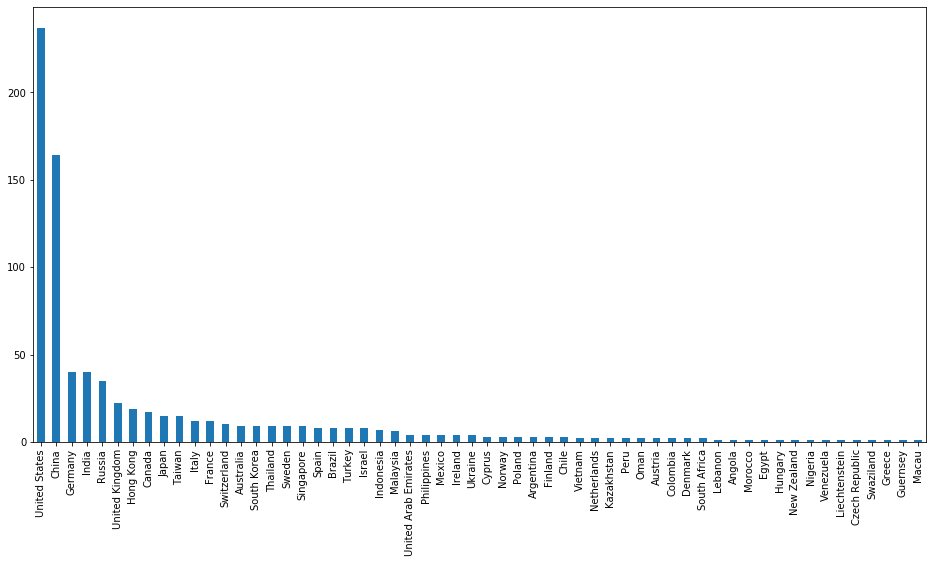

In [83]:
df['country'].value_counts().plot(kind='bar', figsize = (16,8))

In [59]:
def del_null(df):
    df.dropna(inplace = True)
    null_cols = df.isnull().sum()/len(df)*100
    null_cols[null_cols>0]
    threshold = 40
    null_filter = null_cols > threshold
    drop_cols = list(null_cols[null_filter].index)
    df.drop(drop_cols, axis=1, inplace=True)

del_null(df)
df.head()

,name,position,lastName,age,gender,country,image,Source,worth,worthChange,Company
0,Jeff Bezos,1.0,Bezos,54,None,None,https://specials-images.forbesimg.com/imageser...,Technology,112.0,0.0,Amazon
1,Bill Gates,2.0,Gates,62,Male,None,https://specials-images.forbesimg.com/imageser...,Technology,90.0,-0.001,Microsoft
2,Warren Buffett,3.0,Buffett,87,None,United States,https://specials-images.forbesimg.com/imageser...,Finance and Investments,84.0,-0.002,Berkshire Hathaway
3,Bernard Arnault,4.0,Arnault,69,Male,France,https://specials-images.forbesimg.com/imageser...,Fashion & Retail,72.0,0.0,LVMH
4,Mark Zuckerberg,5.0,Zuckerberg,1985,Male,None,https://specials-images.forbesimg.com/imageser...,Technology,71.0,0.0,Facebook


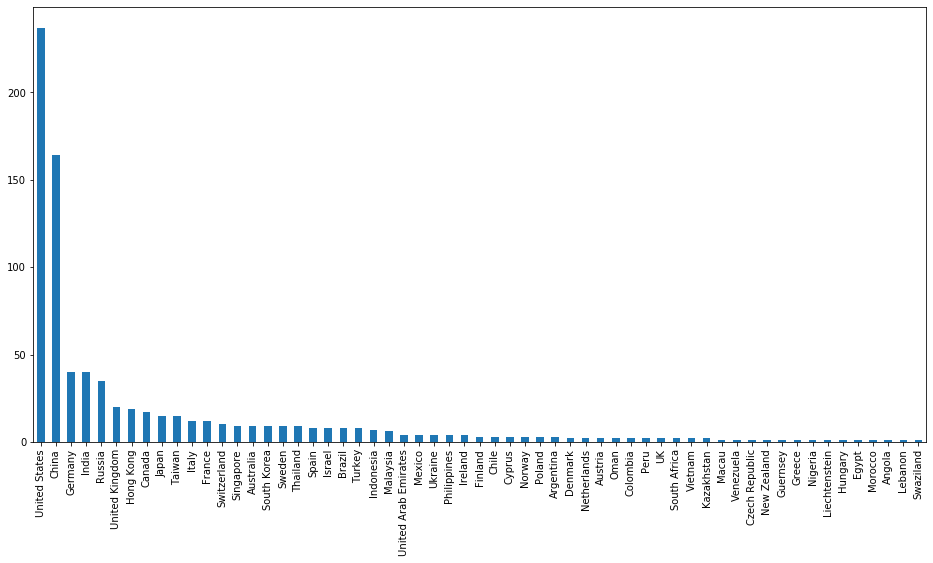

In [81]:
filter_country = df['country'] != 'None'
df = df[filter_country]
df['country'].value_counts().plot(kind='bar', figsize = (16,8))

In [ ]:
def drop_c(df, x):
        df.drop([x], axis=1, inplace=True)
        return df
    
drop_c(dfpop, 'Source')

In [ ]:
def rename_c(df, old, new):
    df.rename(columns={old: new}, inplace=True)
    return df

rename_c(dfpop, 'Country(or dependent territory)', 'Country')
rename_c(dfpop, '% of World Population', 'WeightWorldPopulation')
rename_c(dfpop, 'Rank', 'RankPopulation')
rename_c(dfpop, 'Date', 'Updated')

## Clean dataframe to CSV

In [12]:
df.to_csv('/home/cristina/ironhack/Ironhack-Module-1-Project-Mecaho/data/processed/df_clean.csv',sep=',', index = False)